**Q2**

MOUNTING THE DRIVE

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importing libraries

In [5]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn

Defining Cost Functions

In [6]:
def cost_function_l2(X,y,w,lamb):

    hypothesis = np.dot(X,w.T)
   
    J= (1/(2*len(y)))*np.sum((hypothesis-y)**2) + (lamb/2)*np.sum(w**2)
    return J

In [7]:
def cost_function_l1(X,y,w,lamb):
    w=w.ravel()
    hypothesis = np.dot(X,np.transpose(w))
    
    J= (1/(2*len(y)))*np.sum((hypothesis-y)**2) + (lamb/2)*np.sum(abs(w))
    return J

In [8]:
def cost_function(X,y,w):

    hypothesis = np.dot(X,w.T)
    J = (1/(2*len(y)))*np.sum((hypothesis-y)**2)

    return J

Defining gradient descent functions

In [9]:
def batch_gradient_descent(X,y,w,alpha,iters):
    cost_history = np.zeros(iters)
    for i in range(iters):
        hypothesis = np.dot(X,w.T)
        w = w - (alpha/len(y)) * np.dot(hypothesis - y, X)
        cost_history[i] = cost_function(X,y,w)
    return w, cost_history
    

In [10]:
def stochastic_gradient_descent_l2(X,y,w,alpha, iters,lamb):
    cost_history = np.zeros(iters)
    for i in range(iters):
        rand_index = np.random.randint(len(y)-1)
        ind_x = X[rand_index:rand_index+1]
        ind_y = y[rand_index:rand_index+1]
        w = w*(1-alpha*lamb) - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
        cost_history[i] = cost_function_l2(ind_x,ind_y,w,lamb)
    return w, cost_history

In [11]:
def MB_gradient_descent_l1(X,y,w,alpha, iters, batch_size,lamb):
    cost_history = np.zeros(iters)
    
    w= np.zeros(((X.shape[1]),1))

    for i in range(iters):
        
        rand_index = np.random.randint(len(y)-batch_size)
        ind_x = X[rand_index:rand_index+batch_size]
        ind_y = y[rand_index:rand_index+batch_size]
        w = w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y) - (lamb/2)*np.sign(w))
        cost_history[i] = cost_function_l1(ind_x,ind_y,w,lamb)
    return w, cost_history

Defining MSE, MAE AND CC FUNCTIONS

In [12]:
def mean_abs_error(Ypred,Yact):
    sum_error=abs(Yact - Ypred)
    ma_error=sum(sum_error)/Ypred.shape[0]
    return ma_error

In [13]:
def mean_square_error(Ypred,Yact):
  for i in range(Ypred.shape[0]):
    sum_error=(Yact - Ypred)**2
  ms_error=sum(sum_error)/Ypred.shape[0]
  return ms_error

In [14]:
def correcoff(Ypred,Yact):
    ypm=np.mean(Ypred)##mean of Ypred data
    yam=np.mean(Yact)##mean of Yactual data

    sum_numerator=((Yact - yam)*(Ypred-ypm))
    
    sum_d1=((Yact - yam)**2)
    sum_d2=((Ypred - ypm)**2)  
    sum_d1=pow(sum(sum_d1),1/2)
    sum_d2=pow(sum(sum_d2),1/2)
    th_error=sum(sum_numerator)/(sum_d1*sum_d2)
    return th_error

LOADING THE DATA

In [15]:
data_X = pd.read_excel('/content/drive/MyDrive/nnfl data/Q1_Q2/xtr.xlsx',header=None)
data_Y = pd.read_excel('/content/drive/MyDrive/nnfl data/Q1_Q2/ytr.xlsx',header=None)
data_Xte = pd.read_excel('/content/drive/MyDrive/nnfl data/Q1_Q2/xte.xlsx',header=None)
data_Yte = pd.read_excel('/content/drive/MyDrive/nnfl data/Q1_Q2/yte.xlsx',header=None)
Xte=data_Xte.values
Xte1=Xte[:,0].reshape(Xte.shape[0],1)
Xte2=Xte[:,1].reshape(Xte.shape[0],1)
k=Xte.shape[0]
Yte=data_Yte.values
Yte1=Yte[:,0].reshape(Yte.shape[0],1)

NORMALISING THE TRAINING DATA

In [16]:
datan_x=data_X.values
X1=datan_x[:,0].reshape(datan_x.shape[0],1)
X2=datan_x[:,1].reshape(datan_x.shape[0],1)
m=X1.shape[0]

x1min=np.min(X1,axis=0)
x1max=np.max(X1,axis=0)
X1= (X1-x1min)/(x1max-x1min)

n=X2.shape[0]

x2min=np.min(X2,axis=0)
x2max=np.max(X2,axis=0)
X2= (X2-x2min)/(x2max-x2min)


MAKING THE FEATURE MAPPING FOR PR

In [17]:
Z=np.ones([m,1])
Z=np.append(Z,X1,axis=1)

Z=np.append(Z,X2,axis=1)

Z=np.append(Z,X1**2,axis=1)
Z=np.append(Z,X2**2,axis=1)
Z=np.append(Z,X1*X2,axis=1)


Zte=np.ones([k,1])
Zte=np.append(Zte,Xte1,axis=1)

Zte=np.append(Zte,Xte2,axis=1)

Zte=np.append(Zte,Xte1**2,axis=1)
Zte=np.append(Zte,Xte2**2,axis=1)
Zte=np.append(Zte,Xte1*Xte2,axis=1)






NORMALISING THE TRAINING OUTPUT

In [18]:
datan_y=data_Y.values
y=datan_y

ymin = np.min(y, axis = 0)
ymax = np.max(y, axis = 0)
y = (y- ymin)/(ymax-ymin)
print(y.shape)

(55, 1)


INITIALISING THE WEIGHT VECTOR

In [19]:
w= np.zeros((Z.shape[1]))
w1=np.zeros((Z.shape[1]))###weight initialization



IMPLEMENTING BATCH GRADIENT DESCENT WITH PR

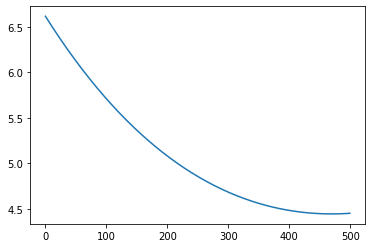

WEIGHT VECTOR [[0.17557825 0.09014305 0.10155515 0.06084765 0.07114284 0.06120531]]
MEAN ABSOLUTE ERROR [34.06934365]
MEAN SQUARE ERROR: [1172.82569505]
CORRELATION COEFF: [-0.00907119]


In [20]:
alpha=0.0006 ##learning rate
iters=500 ###iterations
lamb=1
batch_w,J_his = batch_gradient_descent(Z,y,w,alpha,iters)

plt.plot(range(iters),J_his)
plt.show()

bgd=batch_w[-1:]
print("WEIGHT VECTOR",bgd)

y_pred_bgd=Zte.dot(bgd.T)
a=mean_abs_error(y_pred_bgd,Yte)
print("MEAN ABSOLUTE ERROR",a)

b=mean_square_error(y_pred_bgd,Yte)
print("MEAN SQUARE ERROR:",b)

c=correcoff(y_pred_bgd,Yte)
print("CORRELATION COEFF:",c)

IMPLEMENTING STOCHASTIC GRAIDENT DESCENT WITH PR WITH L2 NORM REGULARISATION

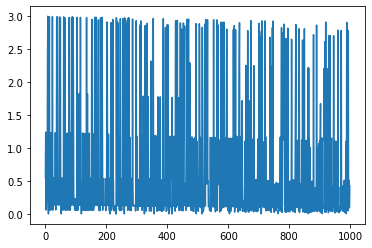

WEIGHT VECTOR: [[0.00834931 0.00834931 0.00834931 0.00834931 0.00834931 0.00834931]]
MEAN ABSOLUTE ERROR [3.22569445]
MEAN SQUARE ERROR: [10.61160124]
CORRELATION COEFF: [-0.00944736]


In [21]:
alpha=0.00006
iters=1000 ###iterations
lamb=0.05
w_n_l2,J_sgd_l2 = stochastic_gradient_descent_l2(Z,y,w,alpha, iters,lamb)

plt.plot(range(iters),J_sgd_l2)
plt.show()

sgd_l2=w_n_l2[-1:]

print("WEIGHT VECTOR:",sgd_l2)

y_pred_sgd_l2=Zte.dot(sgd_l2.T)

a=mean_abs_error(y_pred_sgd_l2,Yte)
print("MEAN ABSOLUTE ERROR",a)

b=mean_square_error(y_pred_sgd_l2,Yte)
print("MEAN SQUARE ERROR:",b)

c=correcoff(y_pred_sgd_l2,Yte)
print("CORRELATION COEFF:",c)

IMPLEMENTING MINI BATCH GRADIENT DESCENT WITH PR WITH L1 NORM REGULARISATION

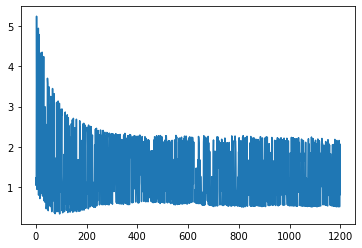

WEIGHT VECTOR: [[ 0.24162462]
 [ 0.0483339 ]
 [ 0.09309818]
 [-0.00305662]
 [ 0.02442236]
 [ 0.00455333]]
MEAN ABSOLUTE ERROR [2.05192643]
MEAN SQUARE ERROR: [4.37638189]
CORRELATION COEFF: [0.00053929]


In [22]:
alpha=0.005 
iters=1200 ###iterations
lamb=0.5
batch_size=35
mb_w_l1,J_mb_l1 = MB_gradient_descent_l1(Z,y,w1,alpha, iters, batch_size,lamb)

plt.plot(range(iters),J_mb_l1)
plt.show()

print("WEIGHT VECTOR:",mb_w_l1)
y_pred_mbg_l1=Zte.dot(mb_w_l1)

a=mean_abs_error(y_pred_mbg_l1,Yte)
print("MEAN ABSOLUTE ERROR",a)

b=mean_square_error(y_pred_mbg_l1,Yte)
print("MEAN SQUARE ERROR:",b)

c=correcoff(y_pred_mbg_l1,Yte)
print("CORRELATION COEFF:",c)